<a href="https://colab.research.google.com/github/cyber-privacy-analytics/DataScienceChegg/blob/main/Evaluating_Classification_Models_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# All imports in one place for convenience
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline


In [ ]:
dataset = fetch_20newsgroups_vectorized()
X, y = dataset.data, dataset.target

In [ ]:
for class_name, class_count  in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

alt.atheism 480
comp.graphics 584
comp.os.ms-windows.misc 591
comp.sys.ibm.pc.hardware 590
comp.sys.mac.hardware 578
comp.windows.x 593
misc.forsale 585
rec.autos 594
rec.motorcycles 598
rec.sport.baseball 597
rec.sport.hockey 600
sci.crypt 595
sci.electronics 591
sci.med 594
sci.space 593
soc.religion.christian 599
talk.politics.guns 546
talk.politics.mideast 564
talk.politics.misc 465
talk.religion.misc 377


In [ ]:
y_2 = y.copy()
y_2[y_2 != 14] = 0
y_2[y_2 == 14] = 1

np.bincount(y_2)

array([10721,   593])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2, random_state=82)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9671261930010604

In [ ]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)


0.9568752209261223

In [ ]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[  29   93]
 [   0 2707]]


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

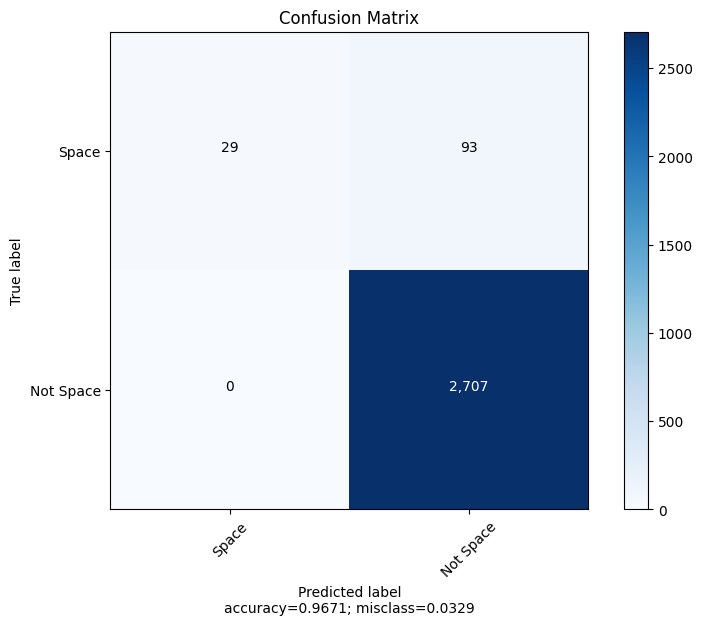

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = ['Space', 'Not Space'], title = 'Confusion Matrix',normalize=False)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, beta=0.5)
fbeta_recall = fbeta_score(y_test, predictions, beta=2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.97
Precision score: 1.00
Recall score: 0.24
F1 score: 0.38
Fbeta score favoring precision: 0.61
FBeta score favoring recall: 0.28


In [ ]:
report = classification_report(y_test, predictions, target_names=['Not Space', 'Space'])
print(report)

              precision    recall  f1-score   support

   Not Space       0.97      1.00      0.98      2707
       Space       1.00      0.24      0.38       122

    accuracy                           0.97      2829
   macro avg       0.98      0.62      0.68      2829
weighted avg       0.97      0.97      0.96      2829



In [ ]:
dummy_report = classification_report(y_test, dummy.predict(X_test), target_names=['Not Space', 'Space'])
print(dummy_report)

              precision    recall  f1-score   support

   Not Space       0.96      1.00      0.98      2707
       Space       0.00      0.00      0.00       122

    accuracy                           0.96      2829
   macro avg       0.48      0.50      0.49      2829
weighted avg       0.92      0.96      0.94      2829



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[1:30])

[0.01354662 0.05706543 0.03516323 0.03309423 0.02927182 0.02200886
 0.45136242 0.01920625 0.07115158 0.08659162 0.03832207 0.02452645
 0.01907482 0.02660723 0.06962218 0.02635995 0.08843953 0.03768179
 0.01426575 0.02404248 0.02627088 0.05918888 0.0312362  0.02432981
 0.06699957 0.06491295 0.04800983 0.02157109 0.03555627]


/tmp/ipython-input-3078659712.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos, hist = False, kde = True, color='g',
/usr/local/lib/python3.12/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipython-input-3078659712.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or 

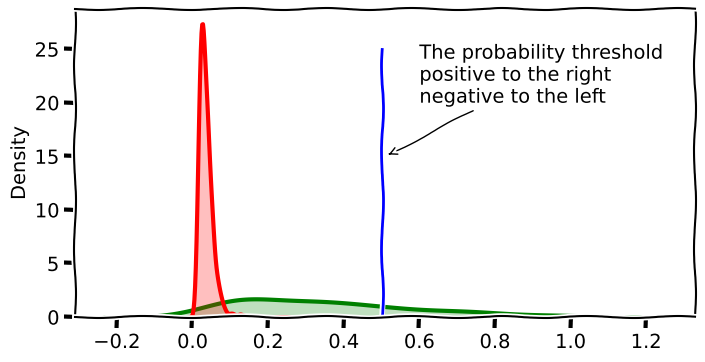

In [ ]:
pos = [i for i, j in zip(probs, y_test) if j == 1]
neg = [i for i, j in zip(probs, y_test) if j == 0]

with plt.xkcd():
  fig = plt.figure(figsize=(8, 4))

  sns.distplot(pos, hist = False, kde = True, color='g',
                 kde_kws = {'shade': True, 'linewidth': 3})

  sns.distplot(neg, hist = False, kde = True, color='r',
                 kde_kws = {'shade': True, 'linewidth': 3})

  plt.plot([0.5, 0.5], [0, 25], '-b')
  plt.annotate(
        'The probability threshold\npositive to the right\nnegative to the left',
        xy=(0.51, 15), arrowprops=dict(arrowstyle='->'), xytext=(0.6, 20))

plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])

[0.         0.         0.00036941 0.00036941 0.00110824 0.00110824
 0.00147765 0.00147765 0.00184706 0.00184706 0.00221648 0.00221648
 0.00258589 0.00258589 0.00332471 0.00332471 0.00369413 0.00369413
 0.00406354 0.00406354 0.00443295 0.00443295 0.0059106  0.0059106
 0.00628001 0.00628001 0.00738825 0.00738825 0.00775767]
[0.00819672 0.43442623 0.43442623 0.52459016 0.52459016 0.59016393
 0.59016393 0.59836066 0.59836066 0.63114754 0.63114754 0.64754098
 0.64754098 0.68852459 0.68852459 0.69672131 0.69672131 0.73770492
 0.73770492 0.74590164 0.74590164 0.7704918  0.7704918  0.78688525
 0.78688525 0.79508197 0.79508197 0.80327869 0.80327869]
[0.98452612 0.3590668  0.35289126 0.31066171 0.30991003 0.27719937
 0.26978999 0.25113914 0.24486077 0.22815454 0.22711515 0.2159166
 0.20510173 0.17736875 0.16632192 0.16542953 0.16495455 0.15684819
 0.15641503 0.15547214 0.15090768 0.1492418  0.13857975 0.13374274
 0.13342661 0.13189627 0.13050461 0.129734   0.12699417]


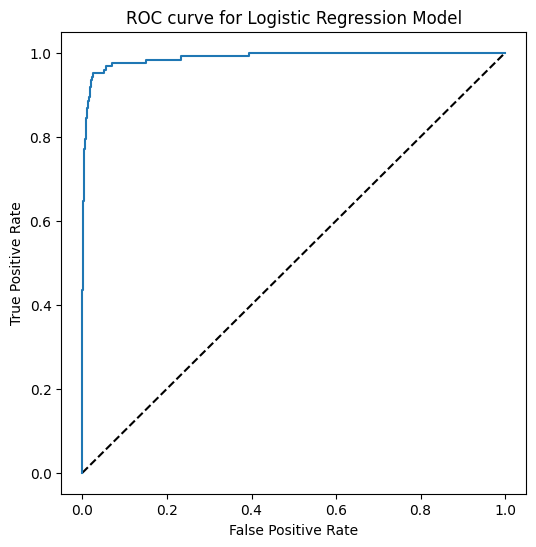

In [ ]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

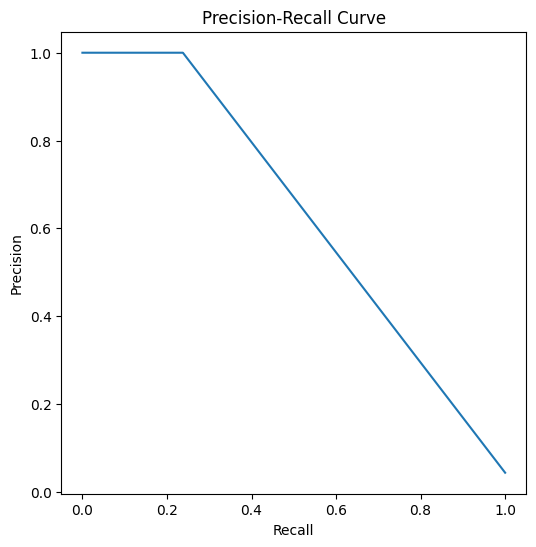

In [ ]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

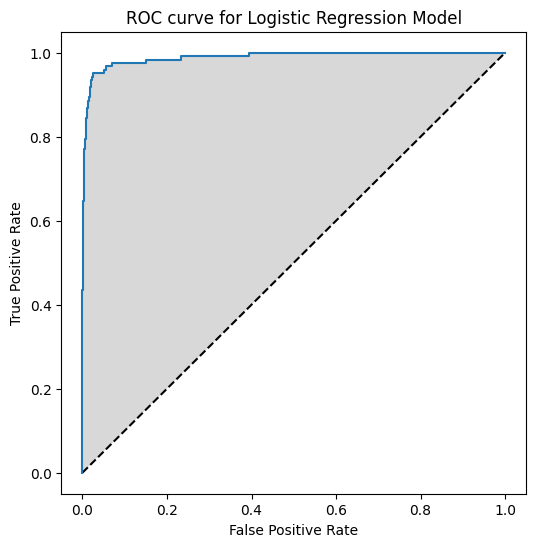

In [ ]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

Area under the ROC curve: 0.989


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('First split score: {:.3f}'.format(lr.score(X_test, y_test)))

X_train, X_test, y_train, y_test = train_test_split(X, y_2)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('Second split score: {:.3f}'.format(lr.score(X_test, y_test)))

First split score: 0.963
Second split score: 0.956


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2, random_state=40)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('First split score: {:.3f}'.format(lr.score(X_test, y_test)))

X_train, X_test, y_train, y_test = train_test_split(X, y_2, random_state=40)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('Second split score: {:.3f}'.format(lr.score(X_test, y_test)))

First split score: 0.964
Second split score: 0.964


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2, random_state=40)
clf = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the five folds:  [0.95167943 0.96169711 0.95816146 0.95639364 0.95875074]
Mean cross-validation score: 0.957
